In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
greater_than = 9

In [32]:
%%time

data_address = '../Data/'
df_gal = pd.read_csv(data_address + f'massive_galaxies_10_{greater_than}.csv') 

df_gal.describe()

CPU times: user 8.73 s, sys: 748 ms, total: 9.48 s
Wall time: 9.48 s


,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],host,dist[kpc/h],vx[km/s],vy[km/s],vz[km/s]
count,8.129884e+06,8.129884e+06,8.129884e+06,8.129884e+06,8.129884e+06,8.129884e+06,8.129884e+06,8.129884e+06,8.129884e+06
mean,3.228079e+05,3.212693e+05,3.204092e+05,2.065932e+10,5.309414e+04,4.126586e+01,-1.965435e-01,8.197470e-02,6.532052e-02
std,1.849920e+05,1.836468e+05,1.837690e+05,6.306788e+10,1.327568e+04,1.588933e+02,3.517809e+02,3.453305e+02,3.289890e+02
min,2.472523e-02,4.897413e-03,8.584157e-02,1.000010e+09,0.000000e+00,0.000000e+00,-4.338618e+03,-3.448558e+03,-3.531906e+03
25%,1.611754e+05,1.632896e+05,1.615300e+05,2.962050e+09,5.723700e+04,0.000000e+00,-2.232941e+02,-2.178965e+02,-2.050924e+02
50%,3.268808e+05,3.250056e+05,3.203614e+05,8.045390e+09,5.723700e+04,0.000000e+00,-5.292745e+00,2.162679e+00,-6.762642e-01
75%,4.820758e+05,4.770594e+05,4.788576e+05,2.148900e+10,5.723700e+04,0.000000e+00,2.185693e+02,2.182743e+02,2.042629e+02
max,6.399999e+05,6.399998e+05,6.399999e+05,1.077460e+13,5.723700e+04,2.689410e+03,3.405616e+03,3.897406e+03,3.396540e+03


In [33]:
df_clusters_subset = pd.read_csv(data_address + 'massive_clusters.csv', 
                          usecols = ['UID', 'x[kpc/h]', 'y[kpc/h]', 'z[kpc/h]', 
                                     'm500c[Msol/h]', 'vx[km/s]', 'vy[km/s]', 'vz[km/s]'    ])  #massive_clusters.csv contains clusters with M_500c greater than 10^13.5 h^{-1} M_sun as done by Tanimura et al. (2020)

df_clusters_subset.describe()

,UID,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6080.000000,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,3488.193257,326416.401838,322055.402286,321308.240244,6.356245e+13,2.109102,-1.647297,-4.296055
std,2329.428037,186021.550694,182650.899538,183665.854310,4.851698e+13,316.064539,306.226537,286.454388
min,0.000000,19.163288,152.653880,87.370949,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,1534.750000,160978.575000,164793.430000,161863.925000,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,3195.500000,338884.565000,333274.345000,322110.075000,4.801630e+13,-3.619450,1.969450,-8.055475
75%,5159.250000,486227.747500,473556.765000,478893.610000,6.945502e+13,206.816750,207.755750,181.532000
max,11472.000000,639887.560000,639933.380000,639848.380000,7.438200e+14,1197.640000,1164.960000,1201.260000


In [34]:
mask = df_gal['host'].isin(df_clusters_subset['UID'])
df_gal_around_6k_clus = df_gal[mask]

df_gal_around_6k_clus.describe()



,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],host,dist[kpc/h],vx[km/s],vy[km/s],vz[km/s]
count,295038.000000,295038.000000,295038.000000,2.950380e+05,295038.000000,295038.000000,295038.000000,295038.000000,295038.000000
mean,329277.062884,323358.112627,322828.747410,5.602123e+10,2490.289698,590.658577,0.923518,2.265724,-1.898977
std,187241.639399,181115.653631,183645.264060,2.488563e+11,2204.039067,378.584533,639.072730,636.934590,626.619906
min,0.946504,0.307792,0.260974,1.000020e+09,0.000000,0.000000,-4338.617700,-3448.557900,-3531.906000
25%,161091.775000,168525.785000,164674.457500,3.602562e+09,635.000000,293.077250,-405.829968,-403.034305,-399.945865
50%,345718.580000,337227.390000,322032.750000,1.165365e+10,1877.000000,539.960000,0.167323,0.836002,-3.214952
75%,491936.682500,471121.672500,479029.760000,2.851195e+10,3884.000000,836.553750,409.154425,406.898737,395.627015
max,639994.000000,639996.310000,639997.560000,1.077460e+13,11472.000000,2689.410000,3405.616200,3897.405800,3396.539600


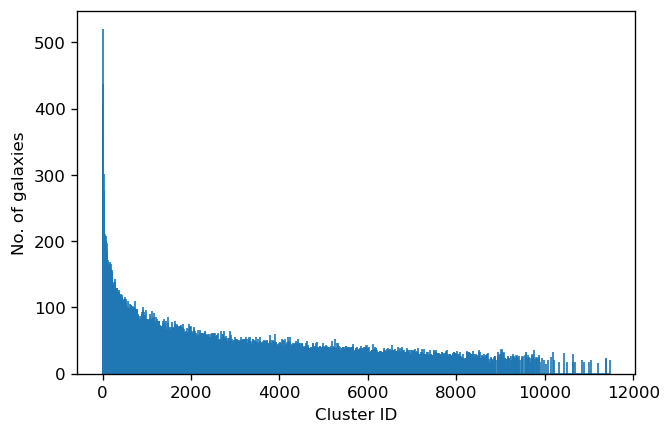

In [35]:
dpi = 120
plt.figure(dpi = dpi)
plt.hist(df_gal_around_6k_clus['host'], bins = max(df_gal_around_6k_clus['host']), 
         ec = 'C0')
# plt.yscale('log')
plt.xlabel('Cluster ID')
plt.ylabel('No. of galaxies');

In [36]:
print(df_gal_around_6k_clus.groupby('host').size().mean())

print(df_gal_around_6k_clus.groupby('host').size().sum())
print(len(df_gal_around_6k_clus))

48.52598684210526
295038
295038


Mean no of galaxies:  48.53
Mean distance of galaxies:  590.66 kpc/h


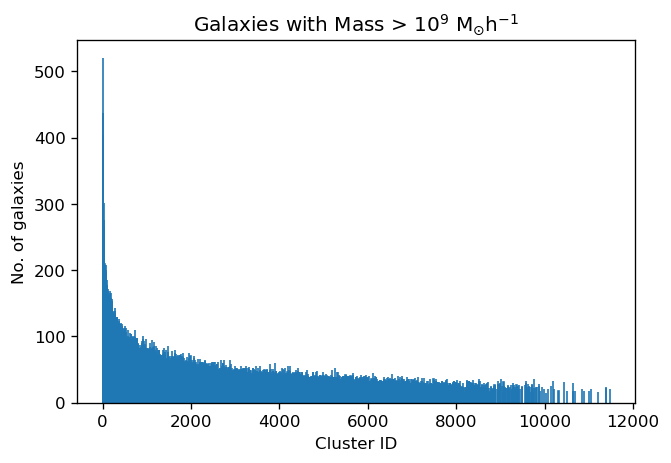

In [39]:
dpi = 120
plt.figure(dpi = dpi)

ser_gal_count = df_gal_around_6k_clus.groupby('host').size()
plt.bar(ser_gal_count.index, height = ser_gal_count,ec = 'C0');

# plt.yscale('log')
plt.xlabel('Cluster ID')
plt.ylabel('No. of galaxies');
plt.title('Galaxies with Mass > 10$^' + f'{greater_than}' + '$ M$_{\odot}$h$^{\mathrm{-1}}$');

print('Mean no of galaxies: ', round(df_gal_around_6k_clus.groupby('host').size().mean(), 2))
# print('Mean distance of galaxies: ', round(df_gal_around_6k_clus.groupby('dist[kpc/h]').size().mean(), 2), 'kpc/h')
print('Mean distance of galaxies: ', round(df_gal_around_6k_clus['dist[kpc/h]'].mean(), 2), 'kpc/h')